# 8장. XGBoost 기본 학습기

*아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.*

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/handson-gb/blob/main/Chapter08/Alternative_Base_Learners.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/handson-gb/blob/main/Chapter08/Alternative_Base_Learners.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

In [1]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !pip install -q --upgrade xgboost
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter08/census_cleaned.csv

In [2]:
# 경고 끄기
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
xgb.set_config(verbosity=0)

## gblinear 적용하기

### gblinear를 당뇨병 데이터셋에 적용하기

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor, XGBClassifier, XGBRFRegressor, XGBRFClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error as MSE

In [4]:
X, y = load_diabetes(return_X_y=True)

In [5]:
kfold = KFold(n_splits=5, shuffle=True, random_state=2)

In [6]:
def regression_model(model):
    # 5폴드 교차 검증으로 음의 평균 제곱 오차를 구합니다.
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)

    # 제곱근을 계산합니다.
    rmse = (-scores)**0.5

    # 평균을 반환합니다.
    return rmse.mean()

In [7]:
regression_model(XGBRegressor(booster='gblinear'))

55.494655757842864

In [8]:
regression_model(LinearRegression())

55.50936875436024

In [9]:
regression_model(Lasso())

62.64904114426351

In [10]:
regression_model(Ridge())

58.835292374356676

In [11]:
regression_model(XGBRegressor(booster='gbtree'))

65.9125519300286

#### gblinear 그리드 서치

In [12]:
def grid_search(params, reg=XGBRegressor(booster='gblinear')):

    # GridSearchCV를 초기화합니다.
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=kfold)
    
    # X_train와 y_train에서 훈련합니다.
    grid_reg.fit(X, y)

    # 최상의 매개변수를 추출합니다.
    best_params = grid_reg.best_params_

    # 최상의 매개변수를 출력합니다.
    print("최상의 매개변수:", best_params)
    
    # 최상의 점수를 추출합니다.
    best_score = np.sqrt(-grid_reg.best_score_)

    # 최상의 점수를 출력합니다.
    print("최상의 점수:", best_score)

In [13]:
grid_search(params={'reg_alpha':[0.001, 0.01, 0.1, 0.5, 1, 5]})

최상의 매개변수: {'reg_alpha': 0.01}
최상의 점수: 55.470286911583536


In [14]:
grid_search(params={'reg_lambda':[0.001, 0.01, 0.1, 0.5, 1, 5]})

최상의 매개변수: {'reg_lambda': 0.001}
최상의 점수: 56.17170054752091


In [15]:
grid_search(params={'feature_selector':['shuffle']})

최상의 매개변수: {'feature_selector': 'shuffle'}
최상의 점수: 55.54339013636666


In [16]:
grid_search(params={'feature_selector':['random', 'greedy', 'thrifty'], 
                    'updater':['coord_descent'] })

최상의 매개변수: {'feature_selector': 'thrifty', 'updater': 'coord_descent'}
최상의 점수: 55.488143951136536


In [17]:
grid_search(params={'feature_selector':['greedy', 'thrifty'], 
                    'updater':['coord_descent'], 'top_k':[3, 5, 7, 9]})

최상의 매개변수: {'feature_selector': 'thrifty', 'top_k': 3, 'updater': 'coord_descent'}
최상의 점수: 55.47871836076556


In [18]:
param_grid = [{'updater':['shotgun'],
               'feature_selector':['cyclic', 'shuffle']},
              {'updater':['coord_descent'],
               'feature_selector':['random', 'greedy', 'thrifty']}]
grid_search(params=param_grid)

최상의 매개변수: {'feature_selector': 'thrifty', 'updater': 'coord_descent'}
최상의 점수: 55.488143951136536


### 선형 데이터셋

In [19]:
X = np.arange(1,100)
np.random.seed(2) 
y = []
for i in X:
    y.append(i*np.random.uniform(-0.2, 0.2))
y = np.array(y)
X = X.reshape(X.shape[0], 1)
y = y.reshape(y.shape[0], 1)

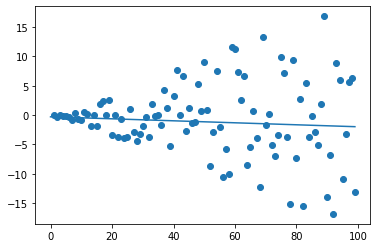

In [20]:
import matplotlib.pyplot as plt

xgbr = XGBRegressor(booster='gblinear')
xgbr.fit(X, y)

plt.scatter(X, y)
plt.plot((0, 99), (xgbr.intercept_, xgbr.coef_*99+xgbr.intercept_))
plt.show()

In [21]:
regression_model(XGBRegressor(booster='gblinear'))

6.214946302686011

In [22]:
regression_model(XGBRegressor(booster='gbtree'))

9.372359516507444

In [23]:
regression_model(LinearRegression())

6.214962315808842

## dart 비교하기

### dart를 사용한 XGBRegressor

In [24]:
X, y = load_diabetes(return_X_y=True)

In [25]:
regression_model(XGBRegressor(booster='dart', rate_drop=0.5))

64.27033739377164

### dart를 사용한 XGBClassifier

In [26]:
df_census = pd.read_csv('census_cleaned.csv')
X_census = df_census.iloc[:, :-1]
y_census = df_census.iloc[:, -1]

In [27]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

def classification_model(model):
    # 교차 검증 정확도를 계산합니다.
    scores = cross_val_score(model, X_census, y_census, 
                             scoring='accuracy', cv=skf)

    # 평균 값을 반환합니다.
    return scores.mean()

In [28]:
classification_model(XGBClassifier(booster='gbtree'))

0.8711649041738863

In [29]:
classification_model(XGBClassifier(booster='dart', rate_drop=0.1))

0.8702743586725623

In [30]:
classification_model(XGBClassifier(booster='gblinear'))

0.8510795079657356

In [31]:
classification_model(LogisticRegression(max_iter=1000))

0.7959523072547026

### dart 매개변수 적용

In [32]:
classification_model(XGBClassifier(booster='dart', one_drop=1))

0.8728233431077743

In [33]:
regression_model(XGBRegressor(booster='dart', rate_drop=0.5, 
                              sample_type='weighted'))

64.78061696170955

In [34]:
regression_model(XGBRegressor(booster='dart', rate_drop=0.5, 
                              normalize_type='forest'))

63.35920574990998

In [35]:
regression_model(XGBRegressor(booster='dart', one_drop=1))

62.74090074152805

In [36]:
grid_search(params={'rate_drop':[0.01, 0.1, 0.2, 0.4]}, 
            reg=XGBRegressor(booster='dart', one_drop=1))

최상의 매개변수: {'rate_drop': 0.2}
최상의 점수: 61.73422394755285


In [37]:
grid_search(params={'skip_drop': [0.01, 0.1, 0.2, 0.4]}, 
            reg=XGBRegressor(booster='dart', rate_drop=0.2, 
                             one_drop=1))

최상의 매개변수: {'skip_drop': 0.01}
최상의 점수: 62.24723633700593


## XGBoost 랜덤 포레스트

### 랜덤 포레스트 기본 학습기

In [38]:
regression_model(XGBRegressor(booster='gbtree', num_parallel_tree=25))

65.95866495368594

### 스탠드얼론 랜덤 포레스트

In [39]:
regression_model(XGBRFRegressor())

59.50114724840314

In [40]:
regression_model(RandomForestRegressor())

59.44526192030271

In [41]:
classification_model(XGBRFClassifier())

0.855563447853867

In [42]:
classification_model(RandomForestClassifier())

0.8564232761089048